# Εργασία 1 Επιβλεπόμενη Μάθηση


Όνομα: Κωνσταντίνα Μαρίνα Μπλέτσα ΑΕΜ: 243

# Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

# Εισαγωγή Δεδομένων

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Μέρος 1 - Λογιστική Παλινδρόμηση

# Ερώτημα 1

# Στατιστικά Στοιχεία

In [3]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Δημιουργία Ιστογραμμάτων

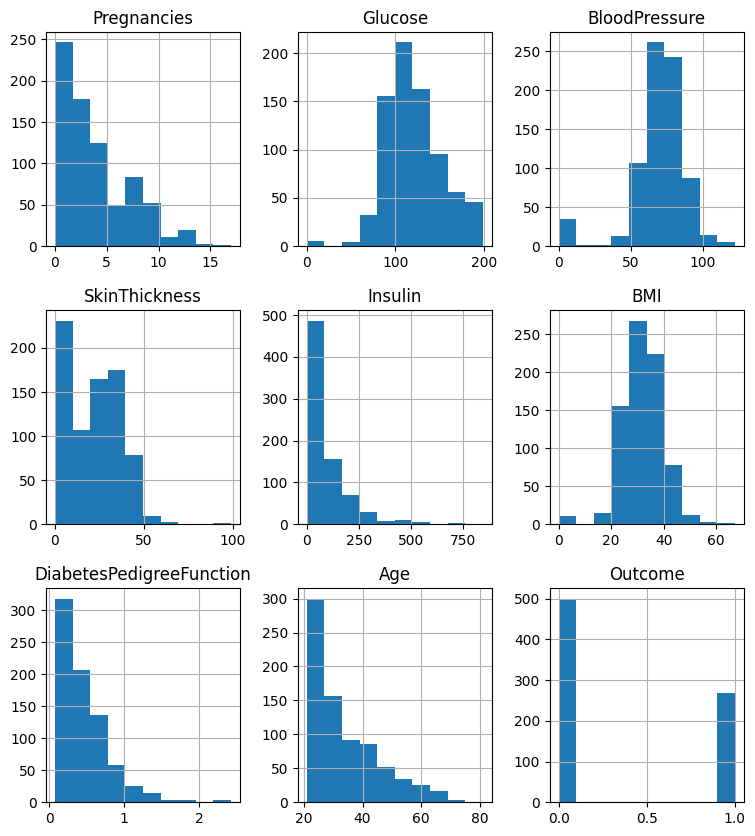

In [4]:
df.hist(figsize=(9, 10))
plt.show()

# Δημιουργία Ραβγογράμματος για το Outcome

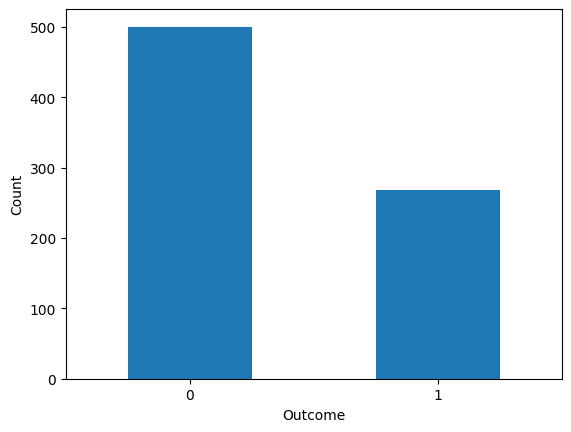

In [5]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Ερώτημα 2 - Αξιολόγηση Ποιότητας Δεδομένων

Στα χαρακτηριστικά Glucose (Γλυκόζη), BloodPressure (Πίεση Αίματος), SkinThickness, Insulin (Ινσουλίνη), και BMI, υπάρχουν πολλές μηδενικές τιμές, κάτι που δεν είναι φυσιολογικό για τις συγκεκριμένες μετρήσεις αφού ένας άνθρωπος δεν μπορεί να έχει μηδενική γλυκόζη, πίεση αίματος, ινσουλίνη ή BMI. Ιδιαίτερα στην μέτρηση της ινσουλίνης υπάρχουν πάρα πολλά μηδενικά περίπου 50% των δεδομένων. Αυτό σημαίνει οτι υπάρχουν λάθος καταγραφές των δεδομένων είτε ελλείψεις και είναι σημαντικό για την ποιότητα των δεδομένων και συνεπώς την ποιότητα του μοντέλου αφού μπορεί να οδηγήσουν σε λάθος συμπεράσματα κατά την εκπαίδευση του.

Επιπλέον υπάρχει ανισορροπία στα δεδομένα για το outcome αφού η μεγάλη πλειοψηφία στα δεδομένα δεν έχει διαβήτη και αυτό μπορει να προκαλέσει λάθος εκπαίδευση του μοντέλου διότι ένα μοντέλο οπως logistic regression μπορεί να μάθει να προβλέπει κυρίως την πλειοψηφική κατηγορία (no diabetes) επειδή έτσι μειώνει τεχνητά το συνολικό σφάλμα.

Συνεπώς η ποιότητα των δεδομένων για την εκπαίδευση ενός τοσο κρίσιμου και σημαντικού μοντέλου θεωρείται κακή.

# Ερώτημα 3 - Κατανομή Μεταβλητής Age

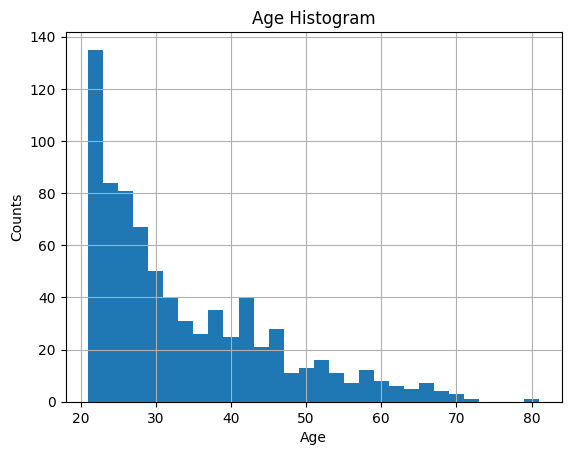

In [6]:
df['Age'].hist(bins=30)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

Η μεταβλητή Age παρουσιάζει θετικά ασύμμετρη κατανομή ή αλλιώς μοιάζει και με εκθετική, αφού οι περισσότερες τιμές συγκεντρώνονται στις μικρότερες ηλικίες, κυρίως 20 με 30 ετών, ενώ όσο αυξάνεται η ηλικία οι καταγραφές μειώνονται σταδιακά. Αυτή η κατανομή δεν είναι ιδανική για την εκπαίδευση του μοντέλου καθώς υπάρχει έλλειψη δεδομένων των μεγαλύτερων ηλικιών. Αυτό σημαίνει ότι το μοντέλο μπορεί να μη μάθει σωστά τα χαρακτηριστικά που σχετίζονται με μεγαλύτερες ηλικίες, μειώνοντας την ακρίβειά του για αυτή την ομάδα η οποία μπορεί να έχει μεγαλύτερο κίνδυνο.

# Ερώτημα 4 - Σχέση Γυκόζης και Διαβήτη

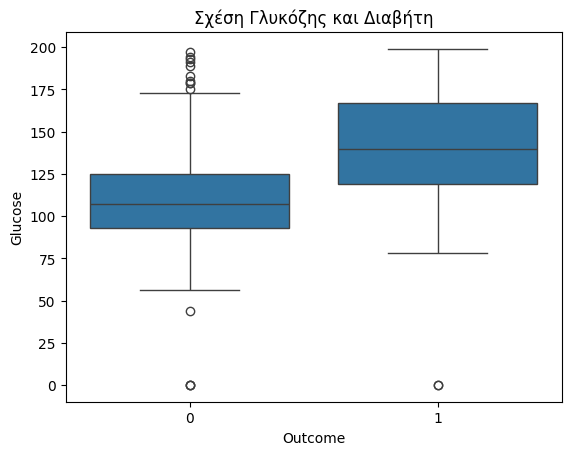

In [7]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Σχέση Γλυκόζης και Διαβήτη')
plt.show()

In [8]:
mean_glucose_no_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()
mean_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()

print("Μέση τιμή γλυκόζης χωρίς διαβήτη:", mean_glucose_no_diabetes)
print("Μέση τιμή γλυκόζης με διαβήτη:", mean_glucose_diabetes)

Μέση τιμή γλυκόζης χωρίς διαβήτη: 109.98
Μέση τιμή γλυκόζης με διαβήτη: 141.25746268656715


Τελικά όπως φαίνεται στο παραπάνω διάγραμμα και την στατιστική ανάλυση υπάρχει σχέση ανάμεσα στην γλυκόζη και στον διαβήτη αφού οι άνθρωποι που έχουν διαβήτη έχουν και υψηλά επίπεδα γλυκόζης και έτσι επιβεβαιώνεται η κλινική μελέτη.

# Ερώτημα 5 - Numpy arrays

In [9]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Χωρισμός Συνόλου Δεδομένων σε σύνολα εκπαίδευσης-επικύρωσης με ποσοστό 70-30%

In [10]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Ερώτημα 6 - Δημιουργία και Εκπαίδευση του Μοντέλου Logistic Regression

In [11]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Αξιολόγηση Μοντέλου στο test set και στο train set

In [12]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_acc =  accuracy_score(y_train, y_pred_train)

test_acc = accuracy_score(y_test, y_pred_test)

print("Ακρίβεια στο Train Set:", train_acc)
print("Ακρίβεια στο Test Set:", test_acc)

Ακρίβεια στο Train Set: 0.7653631284916201
Ακρίβεια στο Test Set: 0.7792207792207793


Συνεπώς συμπεραίνουμε ότι η διαφορά στην ακρίβεια του test και του train ειναι πολύ μικρή, αυτό σημαίνει ότι το μοντέλο γενικεύει καλά στα δεδομένα που δεν έχει κατά την εκπαίδευση οπότε δεν έχουμε overfitting αλλά ούτε underfitting.

# Ερώτημα 7 - ραβδόγραμμα με την ακρίβεια ανά ομάδα ηλικιών του Test set

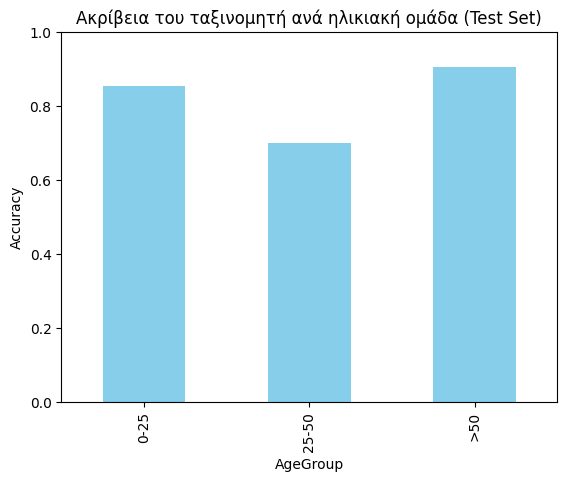

In [13]:
df_test = pd.DataFrame(x_test, columns=input_df.columns)
df_test['True'] = y_test
df_test['Pred'] = y_pred_test

age_groups = pd.cut(df_test['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])
df_test['AgeGroup'] = age_groups

accuracy_per_age = (
    df_test.groupby('AgeGroup', observed=True)[['True', 'Pred']]
    .apply(lambda g: accuracy_score(g['True'], g['Pred']))
)

accuracy_per_age.plot(kind='bar', color='skyblue')
plt.title('Ακρίβεια του ταξινομητή ανά ηλικιακή ομάδα (Test Set)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


Το ραβδόγραμμα δίχνει οτι η ακρίβεια του μοντέλου στις ηλικιακές ομάδες όπως τις χωρίσαμε είναι καλύτερη για τους ανθρώπους ηλικίας άνω των 50 ετών, έπειτα καλύτερη είναι στο ηλικιακό group 0-25 και μετά η πιο χαμηλή είναι για την ηλικιακή ομάδα 25-50.

Συνεπώς το μοντέλο αποδίδει χειρότερα στην ηλικιακή ομάδα 25-50 και πιθανά να χρειάζεται μεγαλύτερη εκπαίδευση σε αυτήν την ομάδα δεδομένων.

# Ερώτημα 8

Θεωρώ πως είναι χειρότερο για τον ταξινομητή στη συγκεκριμένη εφαρμογή, να προβλέπει ότι κάποιος ασθενής δεν έχει διαβήτη ενώ έχει διότι δεν θα το γνωρίζει και δεν θα μπορεί να λάβει την ιατρική φροντιδα και φάρμακα που θα χρειάζεται για να αντιμετωπίσει το πρόβλημα του.

Στην περίπτωση που το μοντέλο προβλέψει οτι κάποιος ασθενής έχει διαβήτη ενώ δεν έχει δεν ειναι τόσο επικίνδυνο καθώς θα κάνει μια εξέταση και θα φανεί οτι δεν διατρέχει κίνδυνο


# Ερώτημα 9 - Επαναλήψεις με seed από 0 εώς 9

In [14]:
accuracies = []

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Accuracies: {accuracies}")

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Μέσος Όρος Ακρίβειας: {mean_accuracy}, Τυπική Απόκλιση Ακρίβειας: {std_accuracy}")

Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]
Μέσος Όρος Ακρίβειας: 0.7735930735930736, Τυπική Απόκλιση Ακρίβειας: 0.019364735278220815


Άρα το μοντέλο πετυχαίνει ικανοποιητική απόδοση με μέσο όρο 77% ακρίβεια, και η τυπική απόκλιση της ακρίβεια σε 10 διαφορετικά πειράματα είναι πολύ χαμηλή 1%

# Ερώτημα 10 - Κανονικοποίηση των δεδομένων Min-Max

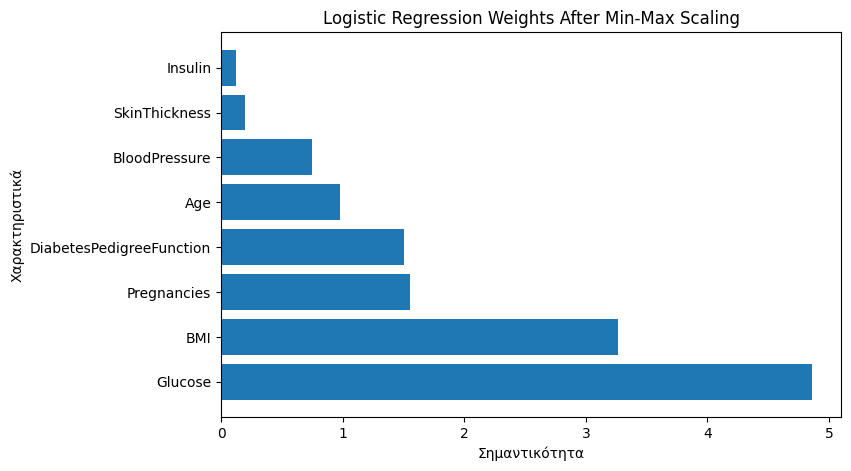



Σημαντικότητα χαρακτηριστικών:
Glucose                     4.856010
BMI                         3.261590
Pregnancies                 1.554917
DiabetesPedigreeFunction    1.506648
Age                         0.978712
BloodPressure               0.749140
SkinThickness               0.194376
Insulin                     0.122658
dtype: float64

Οι 3 πιο σημαντικοί παράγοντες:
Glucose        4.856010
BMI            3.261590
Pregnancies    1.554917
dtype: float64


In [15]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_scaled, y)
coefficients = pd.Series(model.coef_[0], index=input_df.columns)

features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(features.index, features.values)
plt.title('Logistic Regression Weights After Min-Max Scaling')
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.show()

print("\n")
print("Σημαντικότητα χαρακτηριστικών:")
print(features)

top3 = features.head(3)
print("\nΟι 3 πιο σημαντικοί παράγοντες:")
print(top3)

Με βάση την σημαντικότητα των χαρακτηριστικών προκύπτουν τα τρία πιο σημαντικά που επηρεάζουν περισσότερο τον άνθρωπο για την εμφάνιση διαβήτη, αυτά είναι η Γλυκόζη ο δεικτης μάζας σώματος και η εγκυμοσύνη

# Μέρος 2 - Γραμμική Παλινδρόμηση

# Ερώτημα 1 - Δημιουργία Numpy arrays και Χωρισμός σε train-validation set (70%-30%) με seed 0

In [16]:
x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Insulin'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x.shape, y.shape
print(f"Training examples: {len(x_train)}")
print(f"Validation examples: {len(x_test)}")


Training examples: 537
Validation examples: 231


# Ερώτημα 2 - Εκπαίδευση μοντέλου Linear Regression

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Πρόβλεψη στο test set και Υπολογισμός MSE, MAE

In [18]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 10883.73731967615
Mean Absolute Error (MAE): 79.82886812357145


Για δεδομένα γλυκόζης τα οποία μπορεί να περιέχουν ακραίες τιμές, η MAE θεωρείται καταλληλότερη γιατί αποτυπώνει τη μέση πραγματική απόκλιση χωρίς να δίνει έμφαση στην επίδραση των ακραίων τιμών.

# Ερώτημα 3 - Επανάληψη ερωτήματος χρησιμοποιώντας Lasso Regression

In [19]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_accuracies = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(x_train, y_train)

    y_pred = lasso_model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    lasso_accuracies.append(mae)

lasso_results = pd.DataFrame({
    'Alpha': alphas,
    'MAE': lasso_accuracies
})

print(lasso_results)

   Alpha        MAE
0    0.2  79.826659
1    0.4  79.824444
2    0.6  79.822228
3    0.8  79.820012
4    1.0  79.817797


# Ερώτημα 4

Kανονικοποίηση των δεδομένων Min-Max

In [20]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Εκπαίδευση Μοντέλου

In [21]:
model_scaled = LinearRegression()
model_scaled.fit(x_scaled, y)

LinearRegression()

Εύρεση του χαρακτηριστικού με την χαμηλότερη βαρύτητα

In [22]:
coefficients = model_scaled.coef_
feature_importance = pd.DataFrame({
    'Feature': ['Pregnancies', 'BloodPressure', 'BMI', 'Age'],
    'Coefficient': coefficients
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

lowest_weight_feature = feature_importance['Feature'][feature_importance['Coefficient'].idxmin()]
print(f"The feature with the lowest weight is: {lowest_weight_feature}")


         Feature  Coefficient
2            BMI   181.664069
1  BloodPressure    37.937451
3            Age   -12.999637
0    Pregnancies   -41.951723
The feature with the lowest weight is: Pregnancies


Αφαίρεση Χαρακτηριστικού με την μικρότερη βαρύτητα

In [23]:
x_reduced = pd.DataFrame(x, columns=['Pregnancies', 'BloodPressure', 'BMI', 'Age']).drop(columns=[lowest_weight_feature])

Χωρισμός των δεδομένων σε train-test set μετά την αφαίρεση του χαμηλότερου χαρακτηριστικού και Εκπαίδευση του μοντέλου Linear Regression με τα καινούργια χαρακτηριστικά

In [24]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_reduced, y, test_size=0.3, random_state=0)
model_reduced = LinearRegression()
model_reduced.fit(x_train_r, y_train_r)
y_pred_r = model_reduced.predict(x_test_r)

Υπολογισμός MAE, MSE και Εμφάνιση των Αποτελεσμάτων

In [25]:
mse_r = mean_squared_error(y_test_r, y_pred_r)
mae_r = mean_absolute_error(y_test_r, y_pred_r)

print(f"\nΑποτελέσματα χωρίς το χαρακτηριστικό '{lowest_weight_feature}':")
print(f"Mean Squared Error (MSE): {mse_r}")
print(f"Mean Absolute Error (MAE): {mae_r}")



Αποτελέσματα χωρίς το χαρακτηριστικό 'Pregnancies':
Mean Squared Error (MSE): 10941.123030693221
Mean Absolute Error (MAE): 79.63692076029284


Σύγκριση των Αποτελεσμάτων του Αρχικού Μοντέλου με το Νέο Μοντέλο

In [ ]:
print("\nΣύγκριση αποτελεσμάτων:")
print(f"Αρχικό MSE: {mse:.4f}  -->  Νέο MSE: {mse_r:.4f}")
print(f"Αρχικό MAE: {mae:.4f}  -->  Νέο MAE: {mae_r:.4f}")


Σύγκριση αποτελεσμάτων:
Αρχικό MSE: 10883.7373  -->  Νέο MSE: 10941.1230
Αρχικό MAE: 79.8178  -->  Νέο MAE: 79.6369
